# FlexField Fitness vs Chef's Meal

In [1]:
import pandas as pd                                                       # data manipulation and analysis
import numpy as np                                                        # numerical computations and array operations
import seaborn as sns                                                     # statistical data visualization
import matplotlib.pyplot as plt                                           # creating plots and visualizations
from sklearn.model_selection import train_test_split, cross_val_score     # splitting data and cross-validation
from sklearn.preprocessing import StandardScaler, OneHotEncoder           # preprocessing tools for scaling and encoding
from sklearn.impute import SimpleImputer                                  # preprossessing tools for handling missing values
from sklearn.linear_model import LinearRegression                         # regression analysis
import tensorflow as tf                                                   # neural network
from sklearn.neighbors import KNeighborsRegressor                         # knn model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error                            # used for model evaluation

## Read Data

In [2]:
fitness = pd.read_csv('flexfield_fitness.csv')
fitness.head(3)

,Customer ID,Gender,Age,Hours at Gym (per week),Fitness Goal,Gym Membership Length (years),Calorie Intake
0,221958,Female,27,7.3,Build muscle,4,NaN
1,771155,Female,24,6.2,Endurance training,4,2173.0
2,231932,Male,22,7.4,Fat loss,2,1752.0


In [3]:
chefsmeal = pd.read_csv('chefsmeal.csv')
chefsmeal.head(3)

,Customer ID,Gender,Age,Hours at Gym (per week),Fitness Goal,Calorie Intake,Dietary Preferences,Average Spend per Meal Order
0,221958,Female,27,7.3,Build muscle,NaN,Whole foods,67.15
1,771155,Female,24,6.2,Endurance training,2173.0,Whole foods,52.94
2,231932,Male,22,7.4,Fat loss,1752.0,Whole foods,38.13


In [4]:
fitness.describe()

,Customer ID,Age,Hours at Gym (per week),Gym Membership Length (years),Calorie Intake
count,1000.000000,1000.000000,935.000000,1000.000000,961.000000
mean,538112.094000,27.127000,6.148663,2.507000,2295.334027
std,262574.257707,5.017773,1.283104,1.652477,437.179461
min,100404.000000,18.000000,3.000000,0.000000,1500.000000
25%,301536.000000,23.000000,5.300000,1.000000,1922.000000
50%,538556.500000,27.000000,6.100000,2.000000,2321.000000
75%,762517.000000,31.000000,7.100000,4.000000,2686.000000
max,999684.000000,44.000000,10.300000,7.000000,2997.000000


In [5]:
chefsmeal.describe()

,Customer ID,Age,Hours at Gym (per week),Calorie Intake,Average Spend per Meal Order
count,1000.000000,1000.000000,935.000000,961.000000,958.000000
mean,538112.094000,27.127000,6.148663,2295.334027,50.089927
std,262574.257707,5.017773,1.283104,437.179461,10.923013
min,100404.000000,18.000000,3.000000,1500.000000,21.750000
25%,301536.000000,23.000000,5.300000,1922.000000,42.072500
50%,538556.500000,27.000000,6.100000,2321.000000,50.320000
75%,762517.000000,31.000000,7.100000,2686.000000,57.575000
max,999684.000000,44.000000,10.300000,2997.000000,80.590000


In [6]:
fitness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer ID                    1000 non-null   int64  
 1   Gender                         1000 non-null   object 
 2   Age                            1000 non-null   int64  
 3   Hours at Gym (per week)        935 non-null    float64
 4   Fitness Goal                   1000 non-null   object 
 5   Gym Membership Length (years)  1000 non-null   int64  
 6   Calorie Intake                 961 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 54.8+ KB


In [7]:
chefsmeal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Customer ID                   1000 non-null   int64  
 1   Gender                        1000 non-null   object 
 2   Age                           1000 non-null   int64  
 3   Hours at Gym (per week)       935 non-null    float64
 4   Fitness Goal                  1000 non-null   object 
 5   Calorie Intake                961 non-null    float64
 6   Dietary Preferences           958 non-null    object 
 7   Average Spend per Meal Order  958 non-null    float64
dtypes: float64(3), int64(2), object(3)
memory usage: 62.6+ KB


### Data Wrangling
Replace the null values in the 'Hours at Gym (per week)' column with 0.

In [8]:
fitness['Hours at Gym (per week)'].fillna(0, inplace = True)
fitness.describe()

C:\Users\csh03\AppData\Local\Temp\ipykernel_25392\1828430285.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  fitness['Hours at Gym (per week)'].fillna(0, inplace = True)


,Customer ID,Age,Hours at Gym (per week),Gym Membership Length (years),Calorie Intake
count,1000.000000,1000.000000,1000.000000,1000.000000,961.000000
mean,538112.094000,27.127000,5.749000,2.507000,2295.334027
std,262574.257707,5.017773,1.959387,1.652477,437.179461
min,100404.000000,18.000000,0.000000,0.000000,1500.000000
25%,301536.000000,23.000000,5.000000,1.000000,1922.000000
50%,538556.500000,27.000000,6.000000,2.000000,2321.000000
75%,762517.000000,31.000000,7.000000,4.000000,2686.000000
max,999684.000000,44.000000,10.300000,7.000000,2997.000000


In [9]:
fitness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer ID                    1000 non-null   int64  
 1   Gender                         1000 non-null   object 
 2   Age                            1000 non-null   int64  
 3   Hours at Gym (per week)        1000 non-null   float64
 4   Fitness Goal                   1000 non-null   object 
 5   Gym Membership Length (years)  1000 non-null   int64  
 6   Calorie Intake                 961 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 54.8+ KB


In [10]:
chefsmeal['Hours at Gym (per week)'].fillna(0, inplace = True)
chefsmeal.describe()

C:\Users\csh03\AppData\Local\Temp\ipykernel_25392\428210434.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  chefsmeal['Hours at Gym (per week)'].fillna(0, inplace = True)


,Customer ID,Age,Hours at Gym (per week),Calorie Intake,Average Spend per Meal Order
count,1000.000000,1000.000000,1000.000000,961.000000,958.000000
mean,538112.094000,27.127000,5.749000,2295.334027,50.089927
std,262574.257707,5.017773,1.959387,437.179461,10.923013
min,100404.000000,18.000000,0.000000,1500.000000,21.750000
25%,301536.000000,23.000000,5.000000,1922.000000,42.072500
50%,538556.500000,27.000000,6.000000,2321.000000,50.320000
75%,762517.000000,31.000000,7.000000,2686.000000,57.575000
max,999684.000000,44.000000,10.300000,2997.000000,80.590000


In [11]:
chefsmeal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Customer ID                   1000 non-null   int64  
 1   Gender                        1000 non-null   object 
 2   Age                           1000 non-null   int64  
 3   Hours at Gym (per week)       1000 non-null   float64
 4   Fitness Goal                  1000 non-null   object 
 5   Calorie Intake                961 non-null    float64
 6   Dietary Preferences           958 non-null    object 
 7   Average Spend per Meal Order  958 non-null    float64
dtypes: float64(3), int64(2), object(3)
memory usage: 62.6+ KB


Delete rows with null values

In [12]:
fitness = fitness.dropna(how='any',axis=0)
fitness.info()

<class 'pandas.core.frame.DataFrame'>
Index: 961 entries, 1 to 999
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer ID                    961 non-null    int64  
 1   Gender                         961 non-null    object 
 2   Age                            961 non-null    int64  
 3   Hours at Gym (per week)        961 non-null    float64
 4   Fitness Goal                   961 non-null    object 
 5   Gym Membership Length (years)  961 non-null    int64  
 6   Calorie Intake                 961 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 60.1+ KB


In [13]:
chefsmeal = chefsmeal.dropna(how='any', axis=0)
chefsmeal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 885 entries, 1 to 999
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Customer ID                   885 non-null    int64  
 1   Gender                        885 non-null    object 
 2   Age                           885 non-null    int64  
 3   Hours at Gym (per week)       885 non-null    float64
 4   Fitness Goal                  885 non-null    object 
 5   Calorie Intake                885 non-null    float64
 6   Dietary Preferences           885 non-null    object 
 7   Average Spend per Meal Order  885 non-null    float64
dtypes: float64(3), int64(2), object(3)
memory usage: 62.2+ KB


<function matplotlib.pyplot.show(close=None, block=None)>

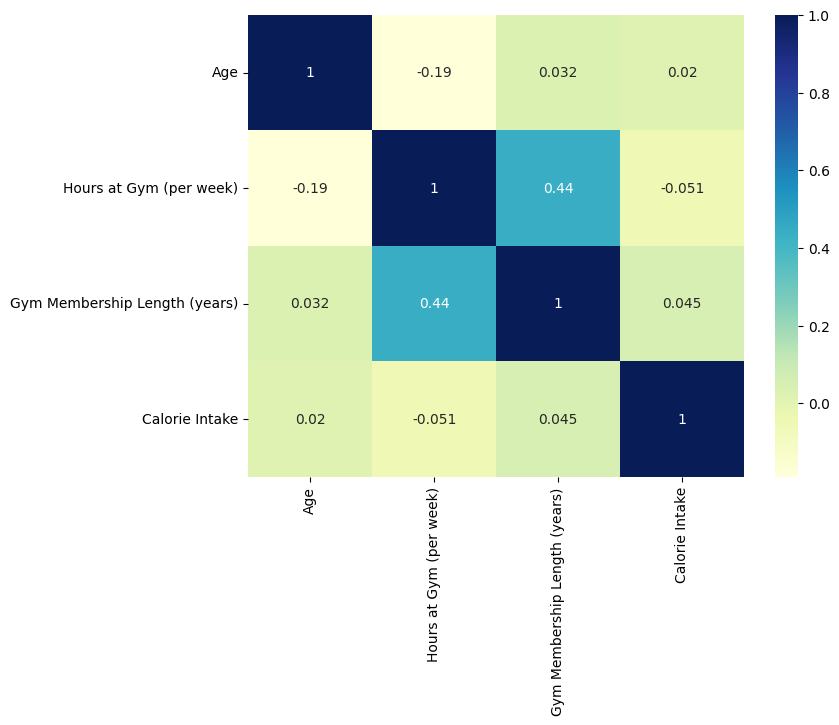

In [14]:
numerical_cols_fitness = ['Age', 'Hours at Gym (per week)', 'Gym Membership Length (years)', 'Calorie Intake']
plt.figure(figsize=(8,6))
sns.heatmap(fitness[numerical_cols_fitness].corr(),cmap='YlGnBu',annot=True)
plt.show

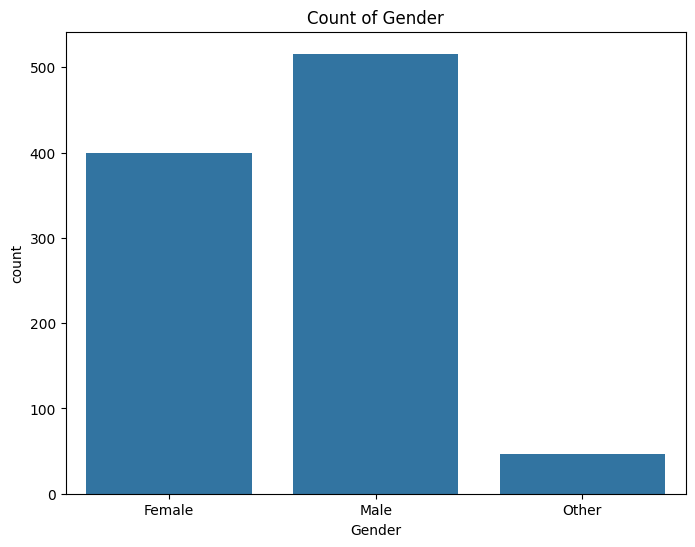

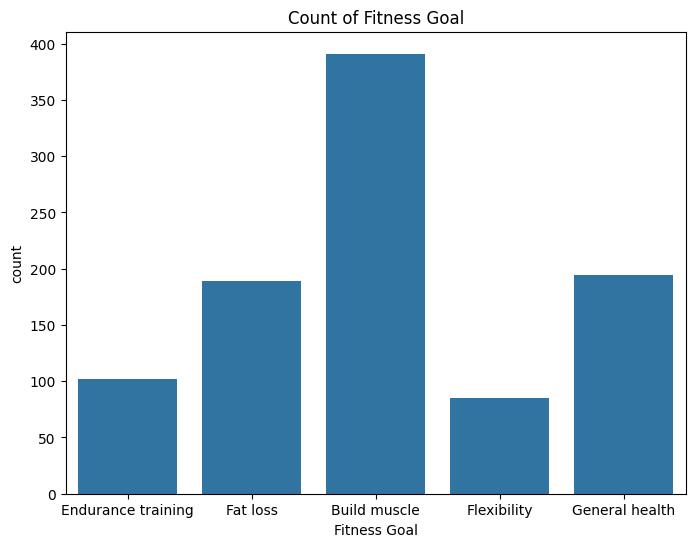

In [15]:
categorical_columns = fitness.select_dtypes(include=['object']).columns

for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=fitness)
    plt.title(f'Count of {column}')
    plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

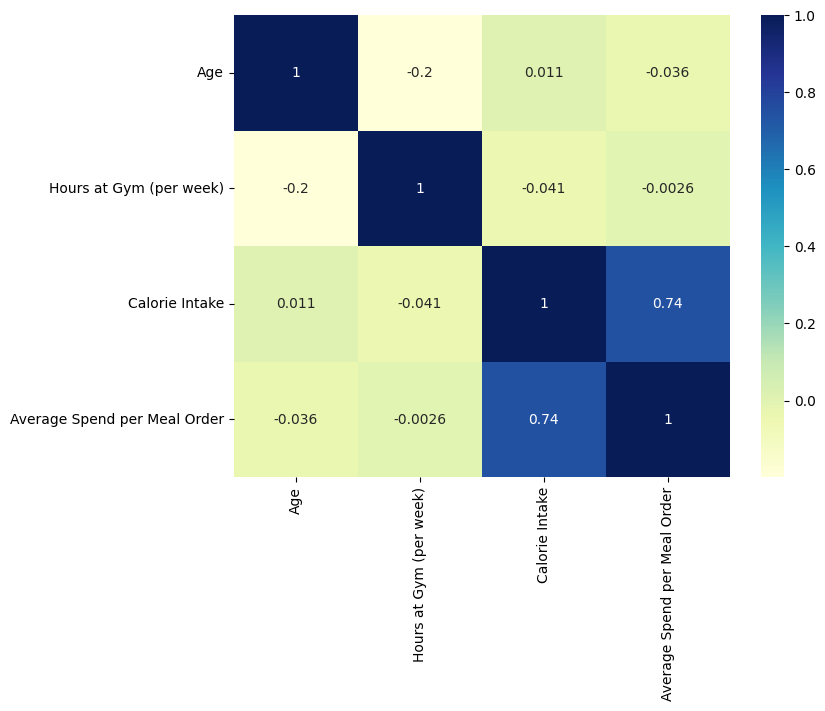

In [16]:
numerical_cols_chefsmeal = ['Age', 'Hours at Gym (per week)', 'Calorie Intake', 'Average Spend per Meal Order']
plt.figure(figsize=(8,6))
sns.heatmap(chefsmeal[numerical_cols_chefsmeal].corr(),cmap='YlGnBu',annot=True)
plt.show

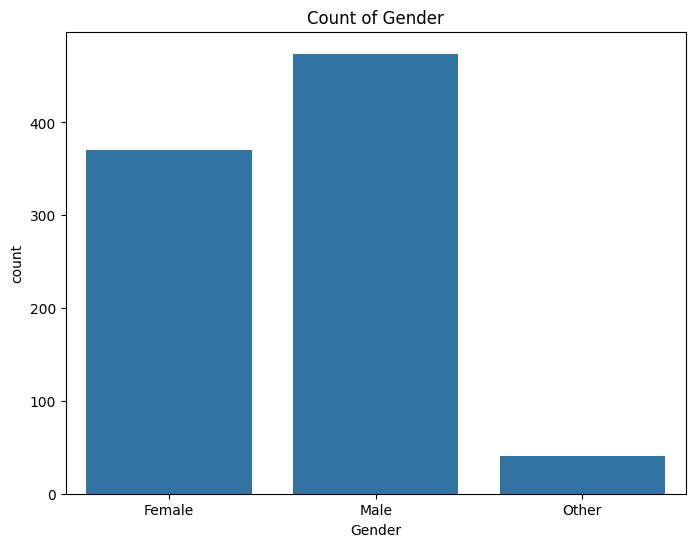

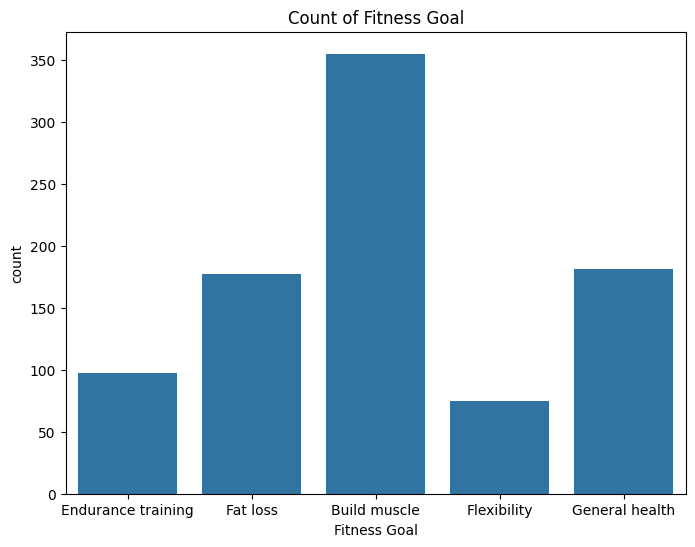

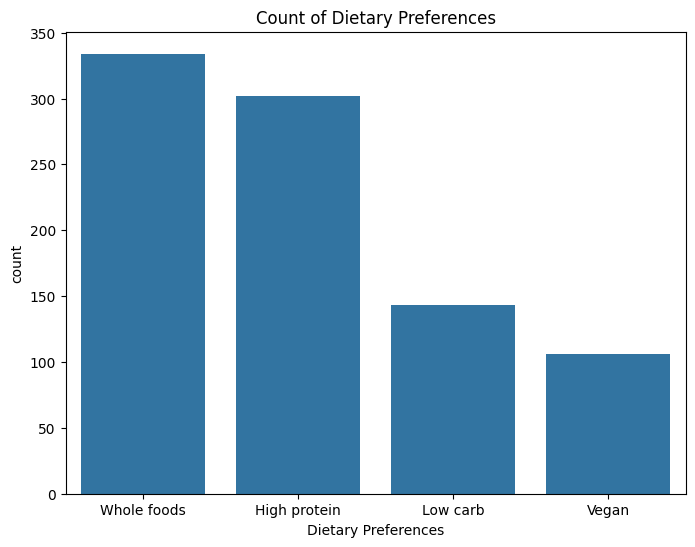

In [17]:
categorical_columns = chefsmeal.select_dtypes(include=['object']).columns

for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=chefsmeal)
    plt.title(f'Count of {column}')
    plt.show()

### Merge datasets based on common columns

In [18]:
merged_data = pd.merge(fitness, chefsmeal, on = ['Customer ID', 'Gender', 'Age', 'Hours at Gym (per week)', 'Fitness Goal', 'Calorie Intake'], how = 'inner')
merged_data.head(3)

,Customer ID,Gender,Age,Hours at Gym (per week),Fitness Goal,Gym Membership Length (years),Calorie Intake,Dietary Preferences,Average Spend per Meal Order
0,771155,Female,24,6.2,Endurance training,4,2173.0,Whole foods,52.94
1,231932,Male,22,7.4,Fat loss,2,1752.0,Whole foods,38.13
2,465838,Female,23,6.0,Build muscle,0,2884.0,High protein,61.44


In [19]:
merged_data.isnull().sum()

Customer ID                      0
Gender                           0
Age                              0
Hours at Gym (per week)          0
Fitness Goal                     0
Gym Membership Length (years)    0
Calorie Intake                   0
Dietary Preferences              0
Average Spend per Meal Order     0
dtype: int64

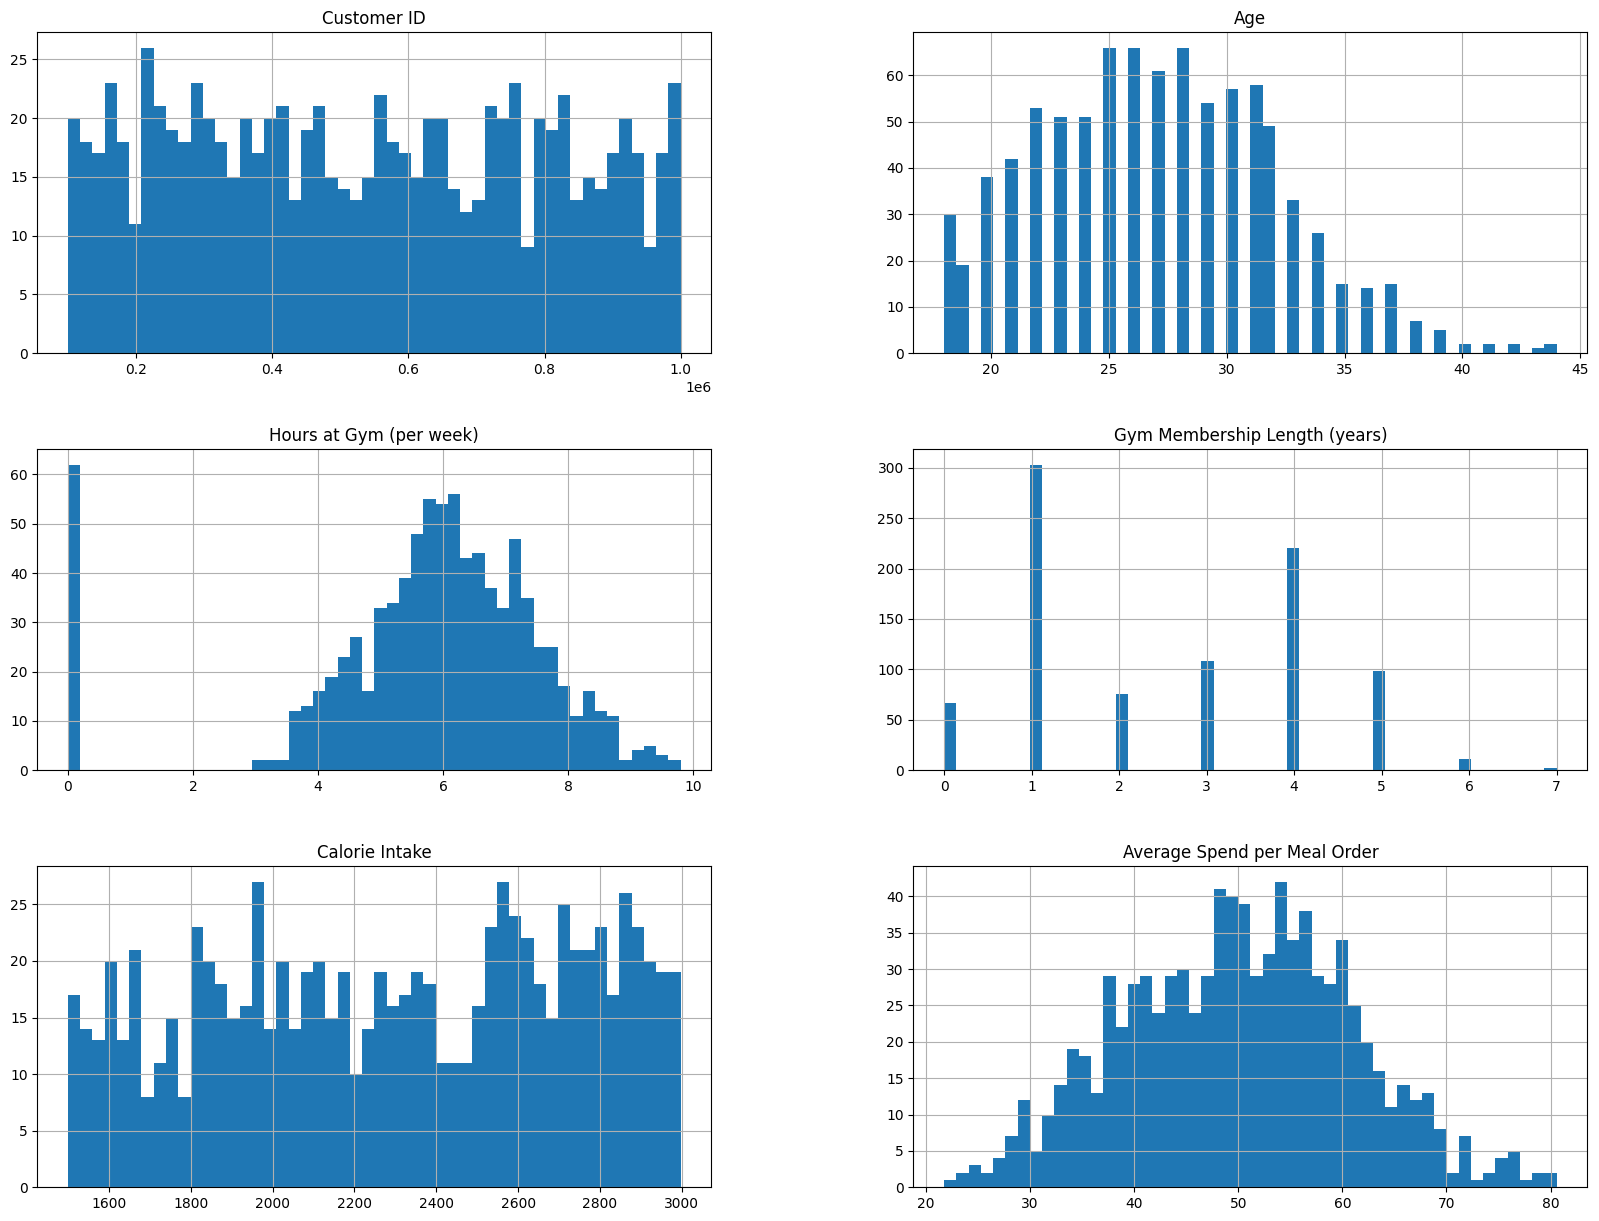

In [20]:
merged_data.hist(bins=50,figsize=(20,15))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

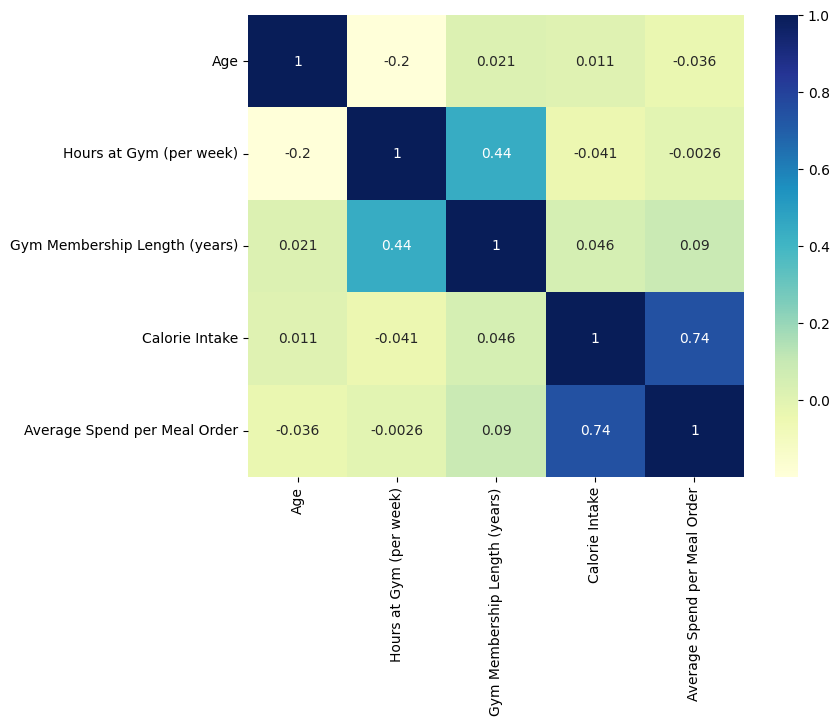

In [21]:
numerical_cols_fitness = ['Age', 'Hours at Gym (per week)', 'Gym Membership Length (years)', 'Calorie Intake', 'Average Spend per Meal Order']
plt.figure(figsize=(8,6))
sns.heatmap(merged_data[numerical_cols_fitness].corr(),cmap='YlGnBu',annot=True)
plt.show

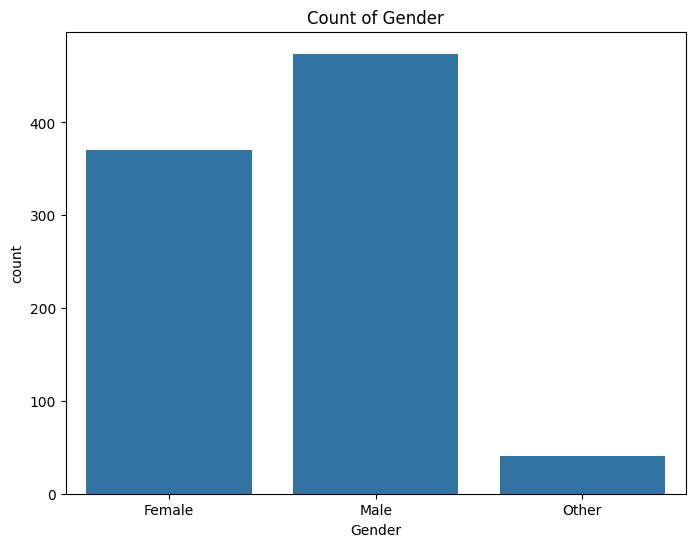

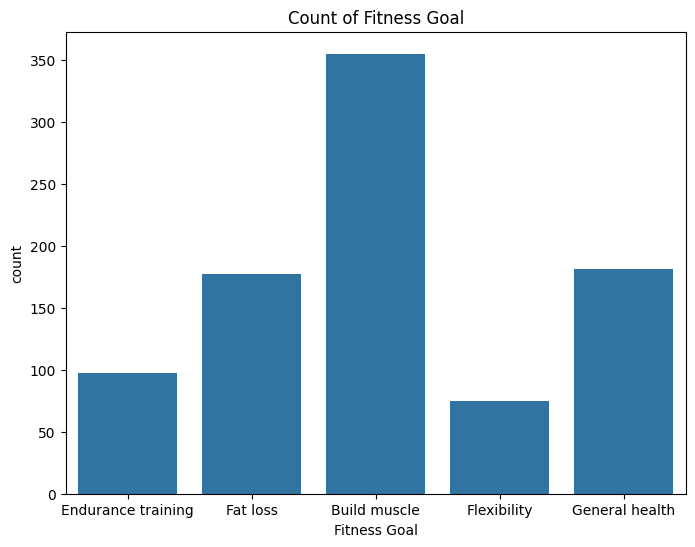

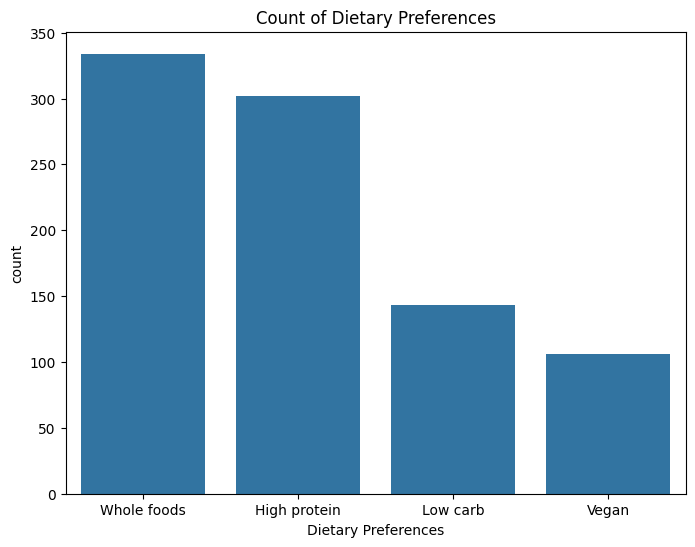

In [22]:
categorical_columns = merged_data.select_dtypes(include=['object']).columns

for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=merged_data)
    plt.title(f'Count of {column}')
    plt.show()

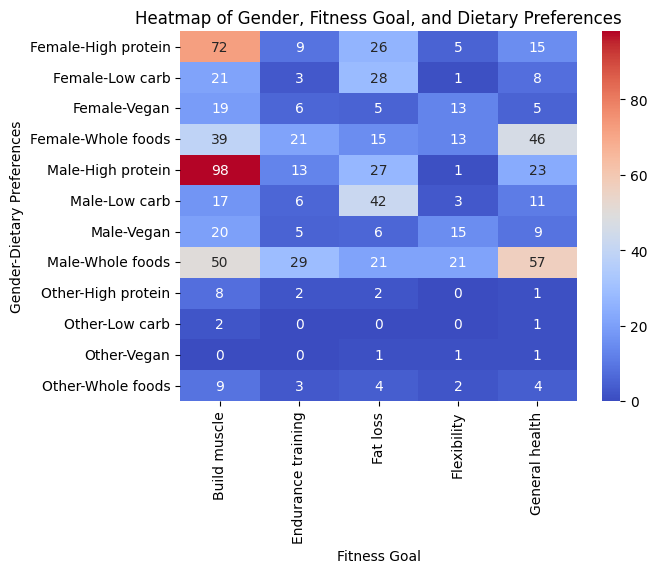

In [23]:
ct = pd.crosstab([merged_data['Gender'], merged_data['Dietary Preferences']], merged_data['Fitness Goal'])

sns.heatmap(ct, annot=True, cmap='coolwarm')
plt.title('Heatmap of Gender, Fitness Goal, and Dietary Preferences')
plt.show()

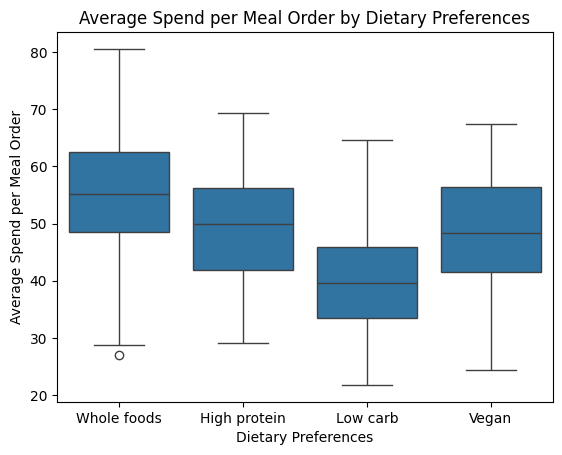

In [24]:
sns.boxplot(x='Dietary Preferences', y='Average Spend per Meal Order', data=merged_data)
plt.title('Average Spend per Meal Order by Dietary Preferences')
plt.show()

no noticable variability

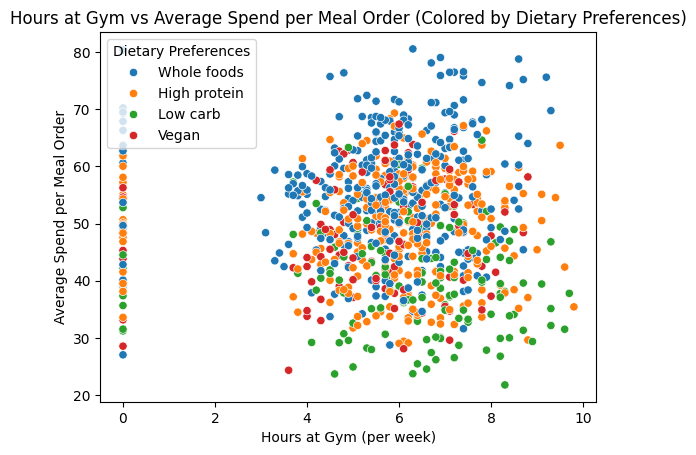

In [25]:
sns.scatterplot(data=merged_data, x='Hours at Gym (per week)', y='Average Spend per Meal Order', hue='Dietary Preferences')
plt.title('Hours at Gym vs Average Spend per Meal Order (Colored by Dietary Preferences)')
plt.show()

no clear linear trend

### Linear regression

In [29]:
import statsmodels.formula.api as smf
# includes interaction terms between hours at gym, dietary preferences, calorie intake, and gym membership length
formula = 'Q("Average Spend per Meal Order") ~ Q("Hours at Gym (per week)") * Q("Dietary Preferences") * Q("Calorie Intake") * Q("Gym Membership Length (years)")'

# fit the linear regression model
model = smf.ols(formula=formula, data=merged_data).fit()

model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Q("Average Spend per Meal Order")   R-squared:                       0.787
Model:                                           OLS   Adj. R-squared:                  0.780
Method:                                Least Squares   F-statistic:                     101.9
Date:                               Thu, 24 Oct 2024   Prob (F-statistic):          2.81e-262
Time:                                       19:41:45   Log-Likelihood:                -2688.3
No. Observations:                                885   AIC:                             5441.
Df Residuals:                                    853   BIC:                             5594.
Df Model:                                         31                                         
Covariance Type:                           nonrobust                                         
===============================================================================================================================================================================================
                                                                                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                                                       0.2586      9.264      0.028      0.978     -17.924      18.441
Q("Dietary Preferences")[T.Low carb]                                                                                           -3.0722     16.052     -0.191      0.848     -34.577      28.433
Q("Dietary Preferences")[T.Vegan]                                                                                              -3.8705     19.001     -0.204      0.839     -41.165      33.424
Q("Dietary Preferences")[T.Whole foods]                                                                                        10.2100     12.281      0.831      0.406     -13.894      34.314
Q("Hours at Gym (per week)")                                                                                                    0.8615      1.634      0.527      0.598      -2.345       4.068
Q("Hours at Gym (per week)"):Q("Dietary Preferences")[T.Low carb]                                                              -0.3323      2.732     -0.122      0.903      -5.695       5.031
Q("Hours at Gym (per week)"):Q("Dietary Preferences")[T.Vegan]                                                                  1.2402      3.501      0.354      0.723      -5.631       8.112
Q("Hours at Gym (per week)"):Q("Dietary Preferences")[T.Whole foods]                                                           -1.1579      2.176     -0.532      0.595      -5.428       3.112
Q("Calorie Intake")                                                                                                             0.0196      0.004      5.006      0.000       0.012       0.027
Q("Dietary Preferences")[T.Low carb]:Q("Calorie Intake")                                                                       -0.0009      0.007     -0.120      0.904      -0.015       0.013
Q("Dietary Preferences")[T.Vegan]:Q("Calorie Intake")                                                                           0.0027      0.009      0.309      0.757      -0.014       0.020
Q("Dietary Preferences")[T.Whole foods]:Q("Calorie Intake")                                                                     0.0002      0.005      0.039      0.969      -0.010       0.011
Q("Hours at Gym (per week)"):Q("Calori

- r-squred value of 0.787 is not bad
the variation in the dependent variable (Average Spend per Meal Order) is explained by the model.

- calorie intake vs. avg spend per meal order shows p-val < 0.001, but other than that...
- Q("Dietary Preferences")[T.Whole foods]:Q("Calorie Intake"):Q("Gym Membership Length (years)") got p-value of 0.049\
-->  individuals with whole food preferences who consume more calories and have longer gym memberships tend to spend more per meal. It could indicate that individuals with specific dietary habits, particularly in this segment, may prioritize healthier or more premium meal options
--> lack of significance for the Vegan and Low carb preferences, meal plans for these segments could be re-evaluated to ensure that they meet the demand and price points that customers are willing to pay tho

In [30]:
formula_2 = 'Q("Gym Membership Length (years)") ~ Q("Hours at Gym (per week)") * Q("Dietary Preferences") * Q("Calorie Intake") * Q("Average Spend per Meal Order")'

# fit the linear regression model
model_2 = smf.ols(formula=formula_2, data=merged_data).fit()

model_summary_2 = model_2.summary()
model_summary_2

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     Q("Gym Membership Length (years)")   R-squared:                       0.228
Model:                                            OLS   Adj. R-squared:                  0.200
Method:                                 Least Squares   F-statistic:                     8.108
Date:                                Thu, 24 Oct 2024   Prob (F-statistic):           4.15e-31
Time:                                        19:52:46   Log-Likelihood:                -1588.2
No. Observations:                                 885   AIC:                             3240.
Df Residuals:                                     853   BIC:                             3394.
Df Model:                                          31                                         
Covariance Type:                            nonrobust                                         
==============================================================================================================================================================================================
                                                                                                                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                                                    -11.8810      8.490     -1.399      0.162     -28.545       4.783
Q("Dietary Preferences")[T.Low carb]                                                                                          -2.0266     13.586     -0.149      0.881     -28.693      24.640
Q("Dietary Preferences")[T.Vegan]                                                                                             26.6127     14.077      1.891      0.059      -1.016      54.241
Q("Dietary Preferences")[T.Whole foods]                                                                                       21.7471     10.661      2.040      0.042       0.823      42.672
Q("Hours at Gym (per week)")                                                                                                   1.1089      1.359      0.816      0.415      -1.559       3.777
Q("Hours at Gym (per week)"):Q("Dietary Preferences")[T.Low carb]                                                              1.2498      2.119      0.590      0.555      -2.909       5.408
Q("Hours at Gym (per week)"):Q("Dietary Preferences")[T.Vegan]                                                                -4.0580      2.487     -1.632      0.103      -8.940       0.824
Q("Hours at Gym (per week)"):Q("Dietary Preferences")[T.Whole foods]                                                          -2.8182      1.747     -1.613      0.107      -6.247       0.610
Q("Calorie Intake")                                                                                                            0.0054      0.004      1.475      0.141      -0.002       0.013
Q("Dietary Preferences")[T.Low carb]:Q("Calorie Intake")                                                                       0.0019      0.006      0.299      0.765      -0.010       0.014
Q("Dietary Preferences")[T.Vegan]:Q("Calorie Intake")                                                                         -0.0117      0.007     -1.733      0.083      -0.025       0.002
Q("Dietary Preferences")[T.Whole foods]:Q("Calorie Intake")                                                                   -0.0106      0.005     -2.163      0.031      -0.020      -0.001
Q("Hours at Gym (per week)"):Q("Calorie In

### Random forest regression

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# convert categorical variables to dummy variables
merged_data_encoded = pd.get_dummies(merged_data)

# target variable & predictors 
X = merged_data_encoded.drop('Gym Membership Length (years)', axis=1)
y = merged_data_encoded['Gym Membership Length (years)']

# training & test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# initialize and train the random forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# predictions and evaluation
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 1.2285389830508477


In [33]:
# Get feature importances
importances = rf.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the most important features
print(feature_importance_df.head(10))

                             Feature  Importance
2            Hours at Gym (per week)    0.476219
1                                Age    0.130711
3                     Calorie Intake    0.107288
4       Average Spend per Meal Order    0.074695
0                        Customer ID    0.069471
10             Fitness Goal_Fat loss    0.059432
12       Fitness Goal_General health    0.017178
11          Fitness Goal_Flexibility    0.008341
13  Dietary Preferences_High protein    0.008099
15         Dietary Preferences_Vegan    0.007967


customers who spend more time at the gym tend to stay longer.

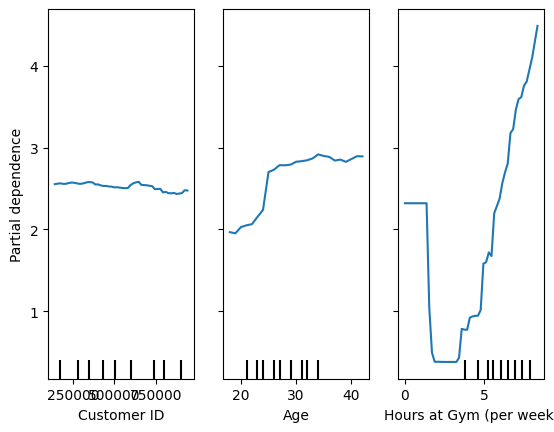

In [43]:
# from sklearn.inspection import PartialDependenceDisplay

# # Plot partial dependence for the top important features
# PartialDependenceDisplay.from_estimator(rf, X_test, features=[0, 1, 2], feature_names=feature_names, grid_resolution=50)